In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'ramen-ratings.csv'  # Update this with your file path
ramen_df = pd.read_csv(file_path)

# Data Cleaning
ramen_df['Stars'] = pd.to_numeric(ramen_df['Stars'], errors='coerce')
ramen_df = ramen_df.drop(columns=['Top_Ten'])
ramen_df = ramen_df.dropna(subset=['Style', 'Stars'])

# Descriptive Statistics
numerical_stats = ramen_df[['Review #', 'Stars']].describe()
print("Numerical Statistics:\n", numerical_stats)

categorical_stats = ramen_df.describe(include=['object'])
print("Categorical Statistics:\n", categorical_stats)

# Correlation Analysis
numeric_columns = ramen_df.select_dtypes(include=['number']).columns
correlation_matrix = ramen_df[numeric_columns].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Data Encoding
encoded_df = pd.get_dummies(ramen_df, columns=['Brand', 'Style', 'Country'])

# Data Transformation
scaler = MinMaxScaler()
encoded_df['Stars_normalized'] = scaler.fit_transform(encoded_df[['Stars']])

# Regression Analysis
X = encoded_df.drop(columns=['Review #', 'Variety', 'Stars', 'Stars_normalized'])
y = encoded_df['Stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Predictions:\n", predictions)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)




Numerical Statistics:
           Review #        Stars
count  2575.000000  2575.000000
mean   1290.225631     3.654893
std     744.318327     1.015641
min       1.000000     0.000000
25%     646.500000     3.250000
50%    1290.000000     3.750000
75%    1934.500000     4.250000
max    2580.000000     5.000000
Categorical Statistics:
          Brand Variety Style Country
count     2575    2575  2575    2575
unique     355    2408     7      38
top     Nissin    Beef  Pack   Japan
freq       381       7  1528     352
Correlation Matrix:
           Review #     Stars
Review #  1.000000  0.243351
Stars     0.243351  1.000000
Predictions:
 [ 3.96166992e+00  4.11389160e+00  4.21948242e+00  3.51562500e+00
  4.35919189e+00  3.75311279e+00  4.11389160e+00  3.52276611e+00
  3.64306641e+00  3.00451660e+00  4.11389160e+00  4.03320312e+00
  4.03167725e+00  5.01135254e+00  3.14282227e+00  3.40087891e+00
  3.56469727e+00  3.81945801e+00  4.09692383e+00  3.13049316e+00
  3.40087891e+00  4.30059814e+00

C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


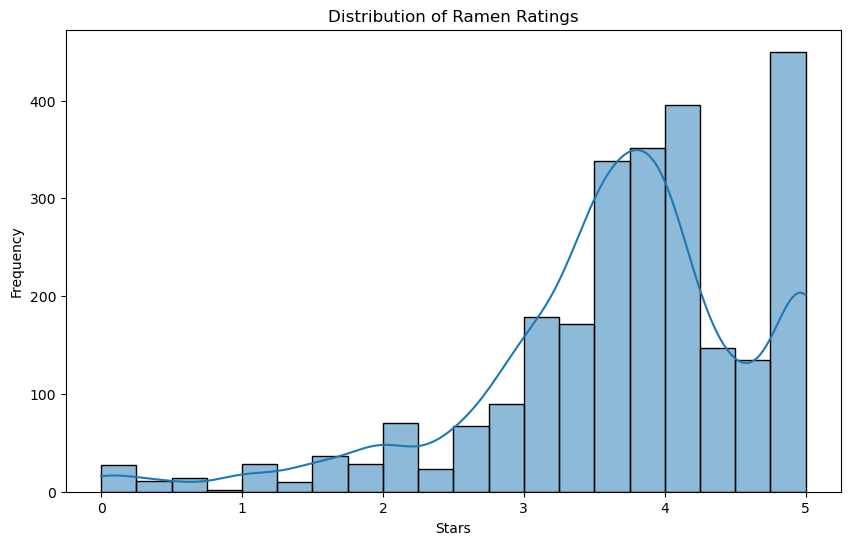

In [5]:
# Graphical Representations

# Distribution of 'Stars'
plt.figure(figsize=(10, 6))
sns.histplot(ramen_df['Stars'], bins=20, kde=True)
plt.title('Distribution of Ramen Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()


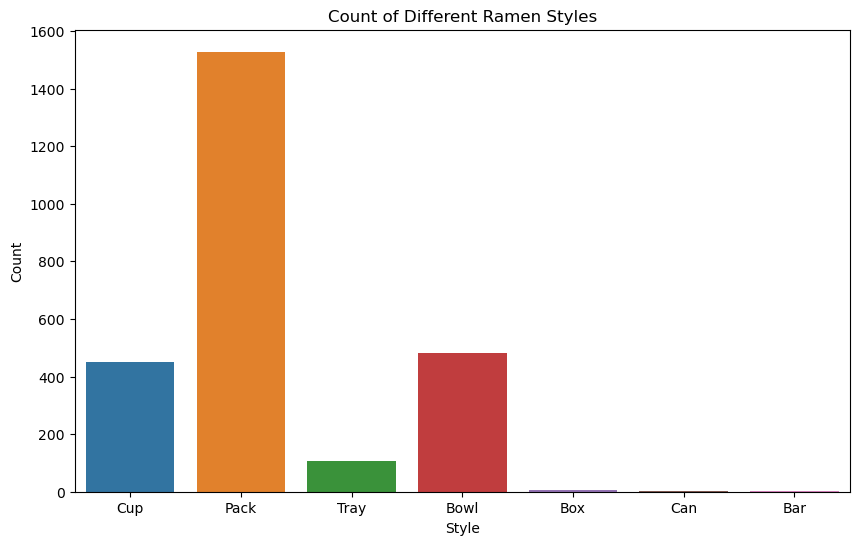

In [6]:

# Count plot for 'Style'
plt.figure(figsize=(10, 6))
sns.countplot(data=ramen_df, x='Style')
plt.title('Count of Different Ramen Styles')
plt.xlabel('Style')
plt.ylabel('Count')
plt.show()



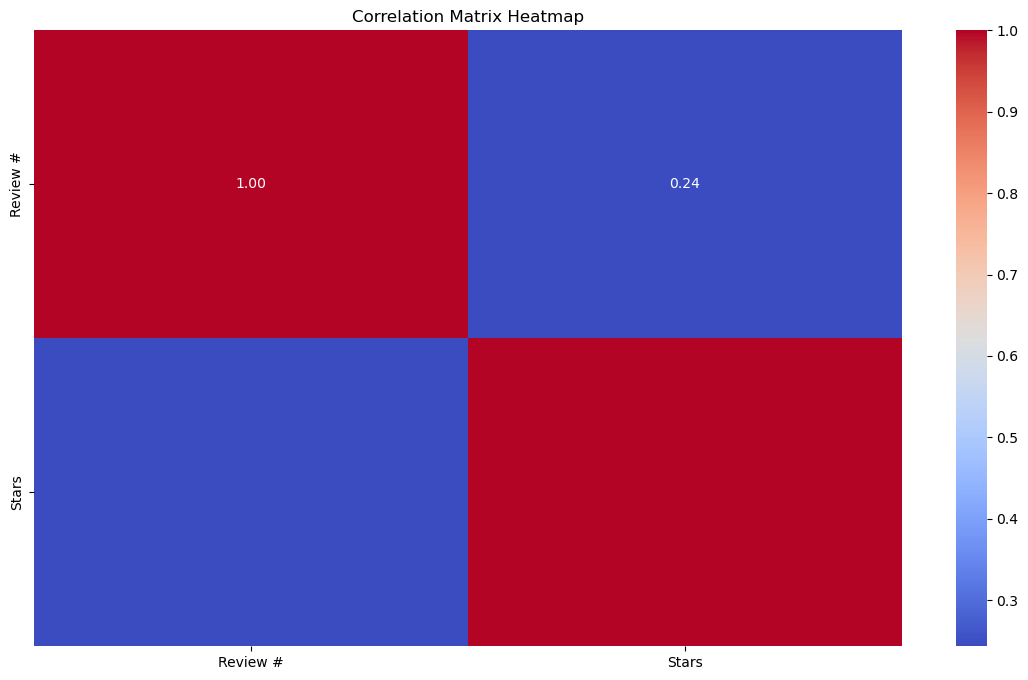

C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


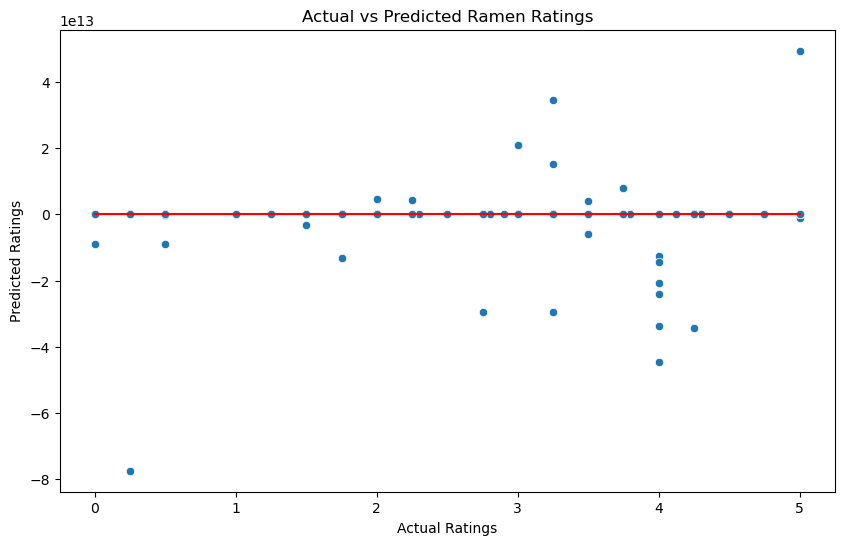

In [7]:
# Correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Regression plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.title('Actual vs Predicted Ramen Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()